In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv("penguins.csv")

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [8]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [4]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [10]:
# Set style
sns.set(style="whitegrid")

<ipython-input-11-a48d24afa0f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='species', palette='Set2')


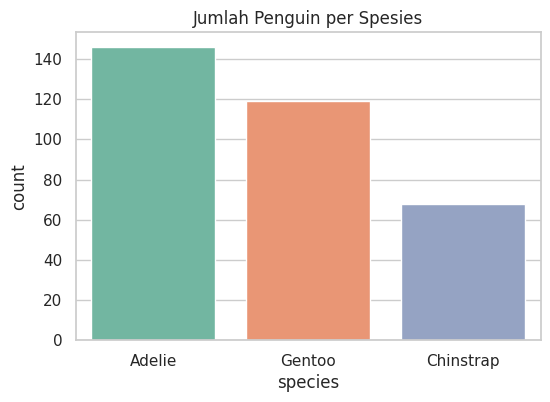

In [11]:
# Distribusi jumlah penguin per spesies
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='species', palette='Set2')
plt.title("Jumlah Penguin per Spesies")
plt.savefig("plot_jumlah_spesies.png")
plt.show()

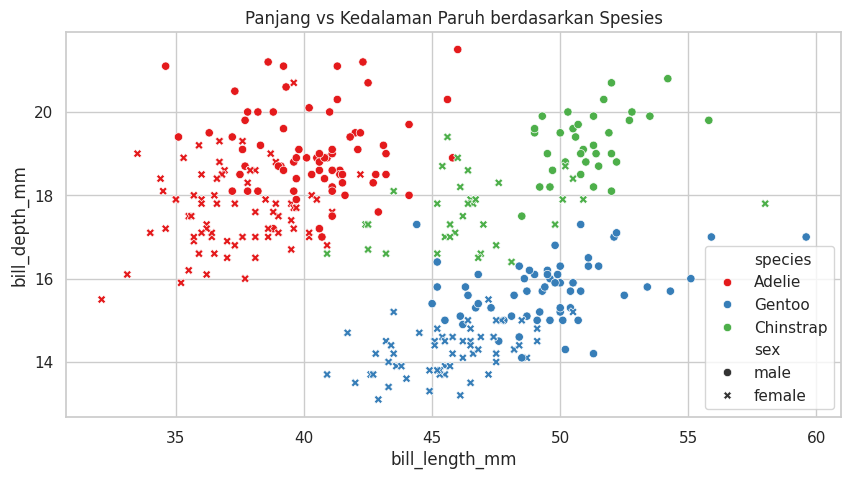

In [12]:
# Distribusi panjang dan kedalaman paruh antar spesies
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', style='sex', palette='Set1')
plt.title("Panjang vs Kedalaman Paruh berdasarkan Spesies")
plt.savefig("plot_paruh.png")
plt.show()

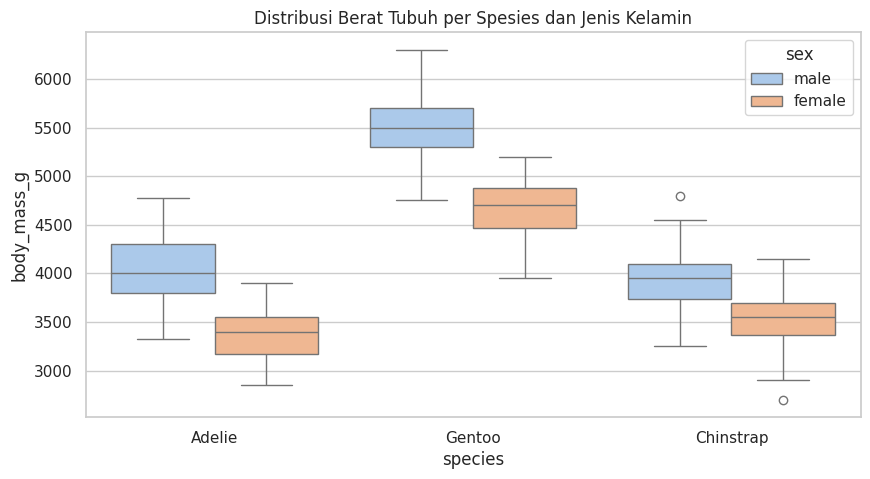

In [14]:
# Boxplot berat tubuh berdasarkan spesies dan jenis kelamin
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='species', y='body_mass_g', hue='sex', palette='pastel')
plt.title("Distribusi Berat Tubuh per Spesies dan Jenis Kelamin")
plt.savefig("plot_berat.png")
plt.show()

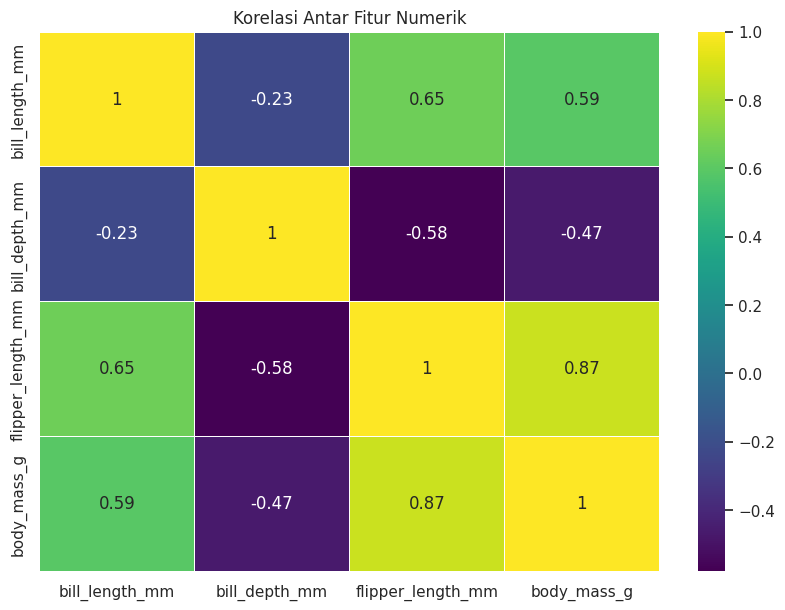

In [15]:
# Heatmap korelasi antar fitur numerik
plt.figure(figsize=(10,7))
corr = df.drop(['species', 'island', 'sex'], axis=1).corr()
sns.heatmap(corr, annot=True, cmap='viridis', linewidths=0.5)
plt.title("Korelasi Antar Fitur Numerik")
plt.savefig("plot_korelasi.png")
plt.show()

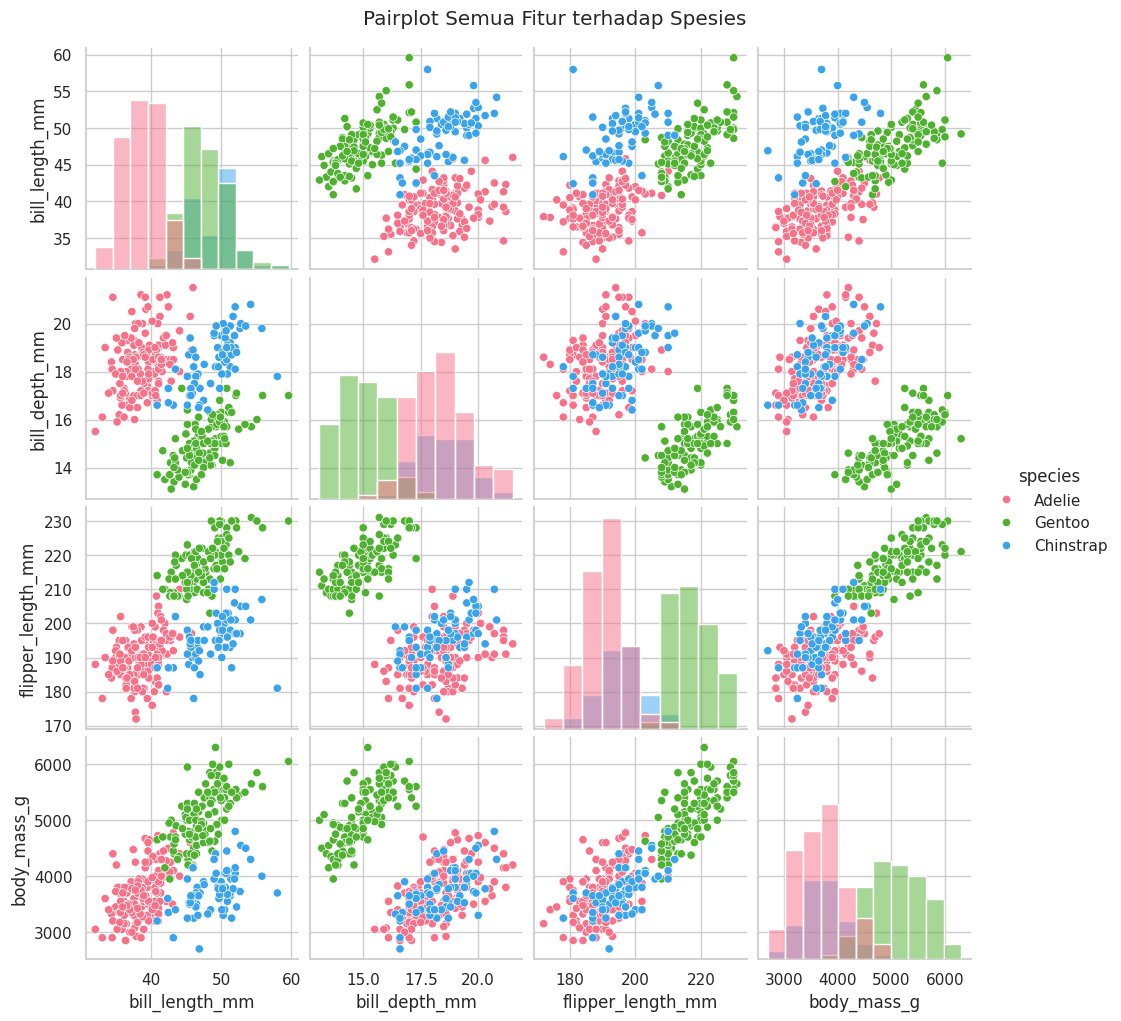

In [16]:
# Pairplot untuk semua fitur numerik dan target
sns.pairplot(data=df, hue='species', diag_kind='hist', palette='husl')
plt.suptitle("Pairplot Semua Fitur terhadap Spesies", y=1.02)
plt.savefig("plot_pairplot.png")
plt.show()

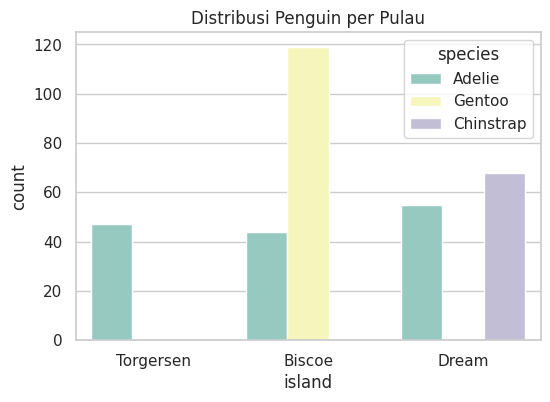

In [17]:
# Distribusi jumlah penguin per pulau
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='island', hue='species', palette='Set3')
plt.title("Distribusi Penguin per Pulau")
plt.savefig("plot_island.png")
plt.show()

In [18]:
# Encode fitur kategorikal
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df['island'] = le.fit_transform(df['island'])
df['sex'] = le.fit_transform(df['sex'])

In [19]:
# Fitur dan target
X = df.drop(columns=['species'])
y = df['species']

In [20]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
df = df.dropna(subset=["body_mass_g", "species", "sex"])

In [23]:
# Hapus outlier menggunakan IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [24]:
# Hapus outlier per kombinasi species dan sex
cleaned_df = pd.DataFrame()
for (species, sex), group in df.groupby(['species', 'sex']):
    filtered = remove_outliers_iqr(group, 'body_mass_g')
    cleaned_df = pd.concat([cleaned_df, filtered], ignore_index=True)

In [25]:
# Tampilkan ukuran dataset sebelum dan sesudah
print("Jumlah data sebelum menghapus outlier:", len(df))
print("Jumlah data setelah menghapus outlier:", len(cleaned_df))

Jumlah data sebelum menghapus outlier: 333
Jumlah data setelah menghapus outlier: 331


In [26]:
# Buat model dari nol (Decision Tree)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Akurasi Decision Tree:", acc)

Akurasi Decision Tree: 1.0


In [29]:
# Simpan model
with open("penguin_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [30]:
# Simpan label encoder species
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

In [31]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)